# Business Understanding

## Context
A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only $499 which is $999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

## Objective
The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

## About the Dataset
This data was gathered during last year's campaign. The data description is as follows:

- **Response (target)**: 1 if customer accepted the offer in the last campaign, 0 otherwise
- **ID**: Unique ID of each customer
- **Year_Birth**: Age of the customer
- **Complain**: 1 if the customer complained in the last 2 years
- **Dt_Customer**: Date of customer's enrollment with the company
- **Education**: Customer's level of education
- **Marital**: Customer's marital status
- **Kidhome**: Number of small children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Income**: Customer's yearly household income
- **MntFishProducts**: The amount spent on fish products in the last 2 years
- **MntMeatProducts**: The amount spent on meat products in the last 2 years
- **MntFruits**: The amount spent on fruits products in the last 2 years
- **MntSweetProducts**: Amount spent on sweet products in the last 2 years
- **MntWines**: The amount spent on wine products in the last 2 years
- **MntGoldProds**: The amount spent on gold products in the last 2 years
- **NumDealsPurchases**: Number of purchases made with discount
- **NumCatalogPurchases**: Number of purchases made using catalog (buying goods to be shipped through the mail)
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebPurchases**: Number of purchases made through the company's website
- **NumWebVisitsMonth**: Number of visits to company's website in the last month
- **Recency**: Number of days since the last purchase

## Goals of the Analysis
1. **Identify Factors Influencing Customer Response**: Analyze the data to identify the key factors that influence whether a customer accepts the offer.
2. **Build a Predictive Model**: Develop a model to predict the likelihood of a customer accepting the offer, which will help in targeting the right customers and reducing campaign costs.
3. **Optimize Marketing Strategy**: Use insights from the analysis to optimize the marketing strategy and improve the effectiveness of the campaign.

By understanding the data and identifying the important factors, we can better predict customer behavior and tailor the marketing efforts to maximize the success of the year-end sale.


# Data Understanding

## Overview of the Dataset
In this section, we will explore the dataset to understand its structure and contents. This will involve loading the data, displaying basic information, and performing some initial visualizations.

### 1. Load the Dataset
First, let's load the dataset and take a look at the first few rows to get an idea of what it looks like.

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('superstore_data.csv')

In [3]:
df.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   6/16/2014        0       189        104              379              111   
1   6/15/2014        0       464          5               64                7   
2   5/13/2014        0       134         11               59               15   
3   11/5/2014        0        10          0                1                0   
4    8/4/2014        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                    4                  6                  1         1   
1                    3                  7                  5         1   
2                    2                  5                  2         0   
3                    0                  2                  7         0   
4                    1                  2                  7         1   

   Complain  
0         0  
1         0  
2         0  
3         0  
4         0

### 2. Data Structure and Types

We will now check the structure of the dataset, including the number of rows and columns, and the data types of each column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Summary Statistics

Next, let's generate summary statistics for the numerical columns in the dataset to understand their distribution and central tendencies.

In [5]:
df.describe()

Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

### 4. Missing Values

We need to check for any missing values in the dataset, as handling missing data will be an important step in data preparation.

In [6]:
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

As we can see, there's missing value in income column

### 5. Data Distribution
To better understand the data, let's visualize the distribution of key variables. This includes both numerical and categorical variables.

#### 5.1 Distribution of Numerical Variables
We will plot histograms for the numerical variables to see their distributions.

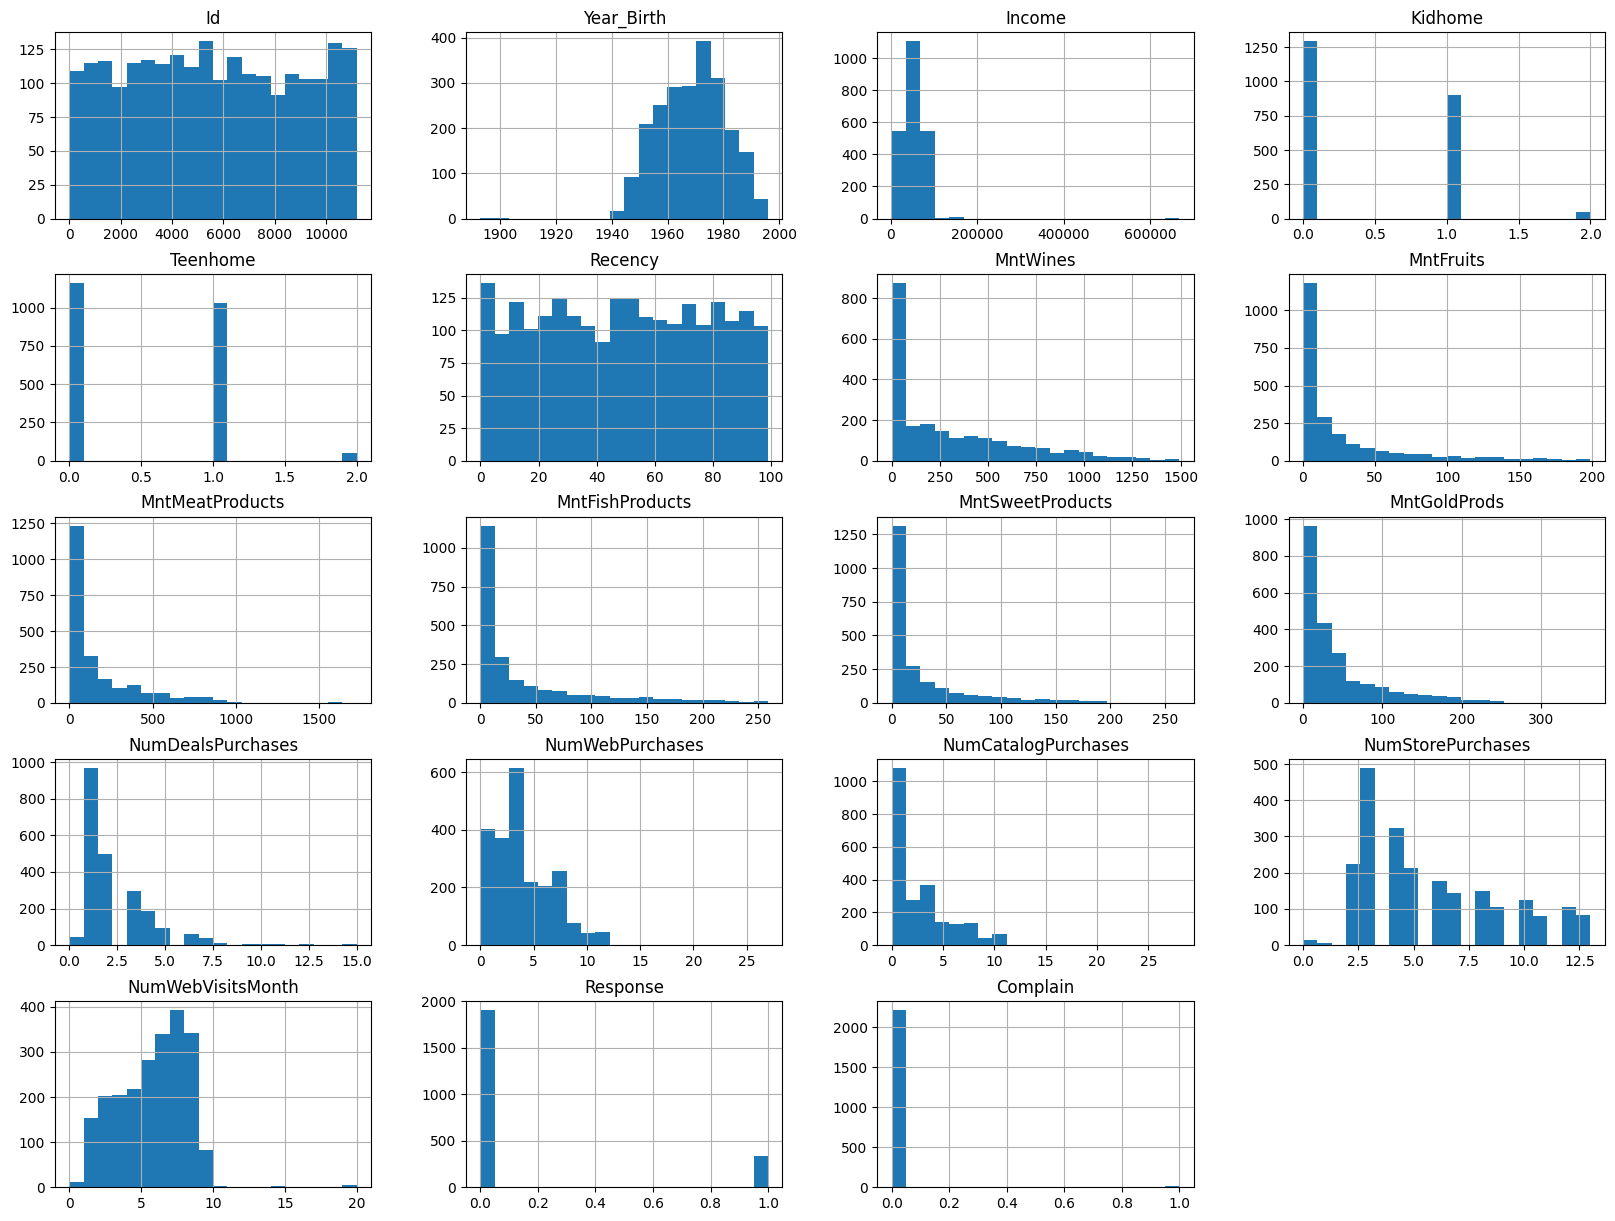

In [7]:
# Plot histograms for numerical variables
df.hist(bins=20, figsize=(20, 15))
plt.show()

#### 5.2 Box Plot of Numerical Variables

We will plot box plots for the numerical variables to identify outliers and understand the spread of the data.

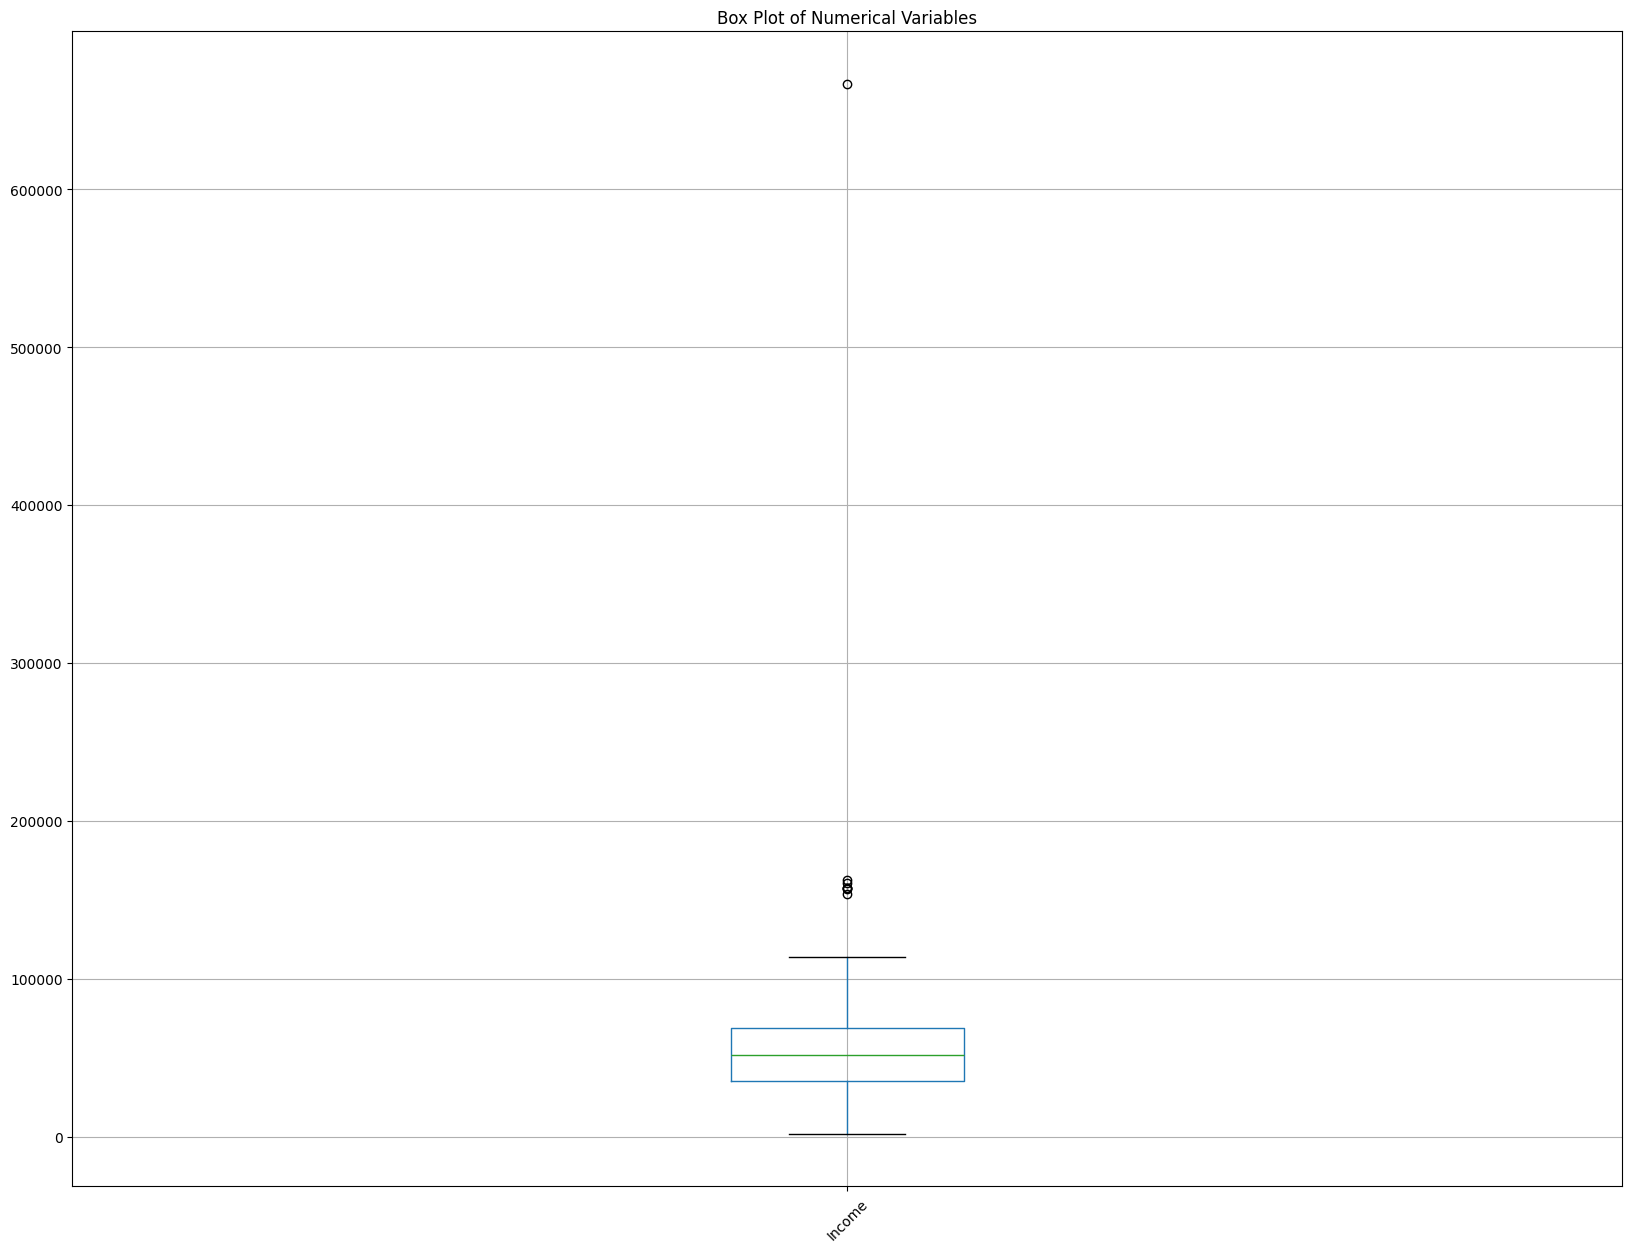

In [8]:
# Plot box plots for numerical variables
numerical_columns = ['Income']

plt.figure(figsize=(20, 15))
df[numerical_columns].boxplot(rot=45)
plt.title('Box Plot of Numerical Variables')
plt.show()

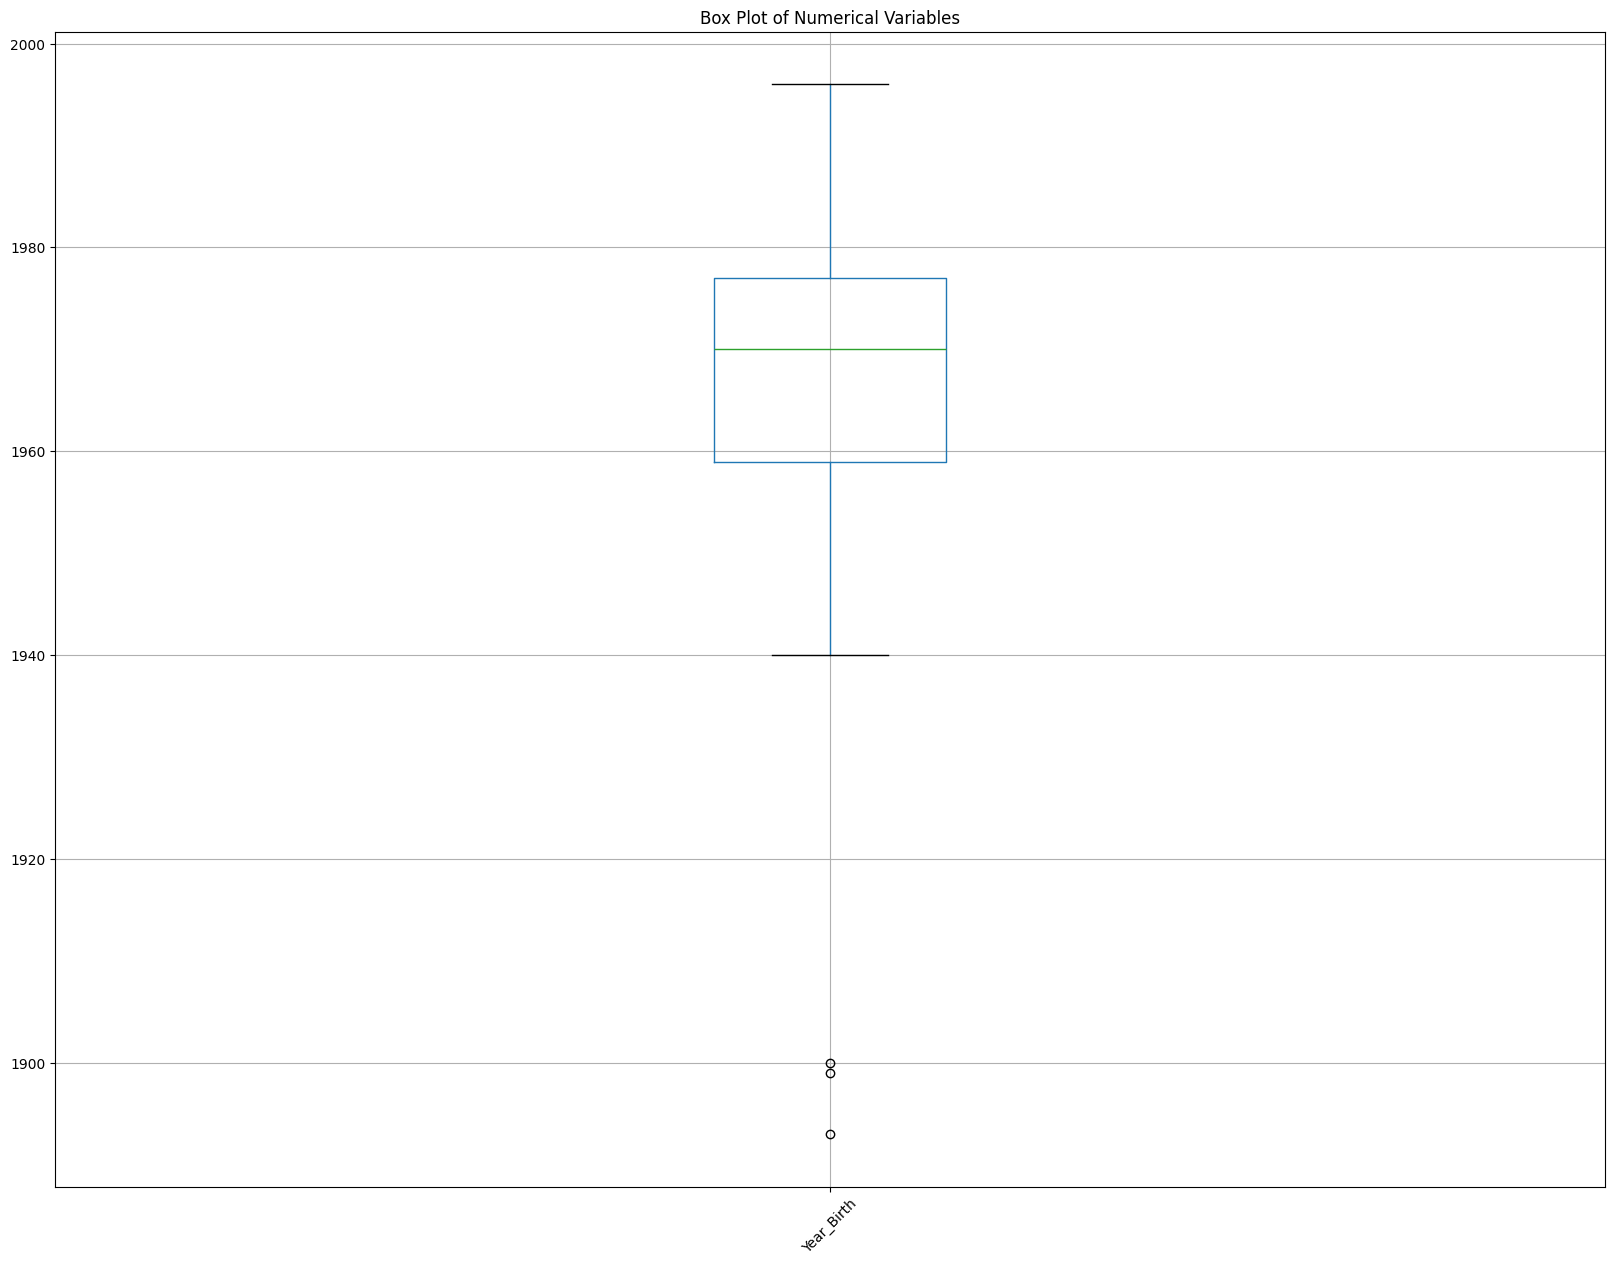

In [9]:
# Plot box plots for numerical variables
numerical_columns = ['Year_Birth']

plt.figure(figsize=(20, 15))
df[numerical_columns].boxplot(rot=45)
plt.title('Box Plot of Numerical Variables')
plt.show()

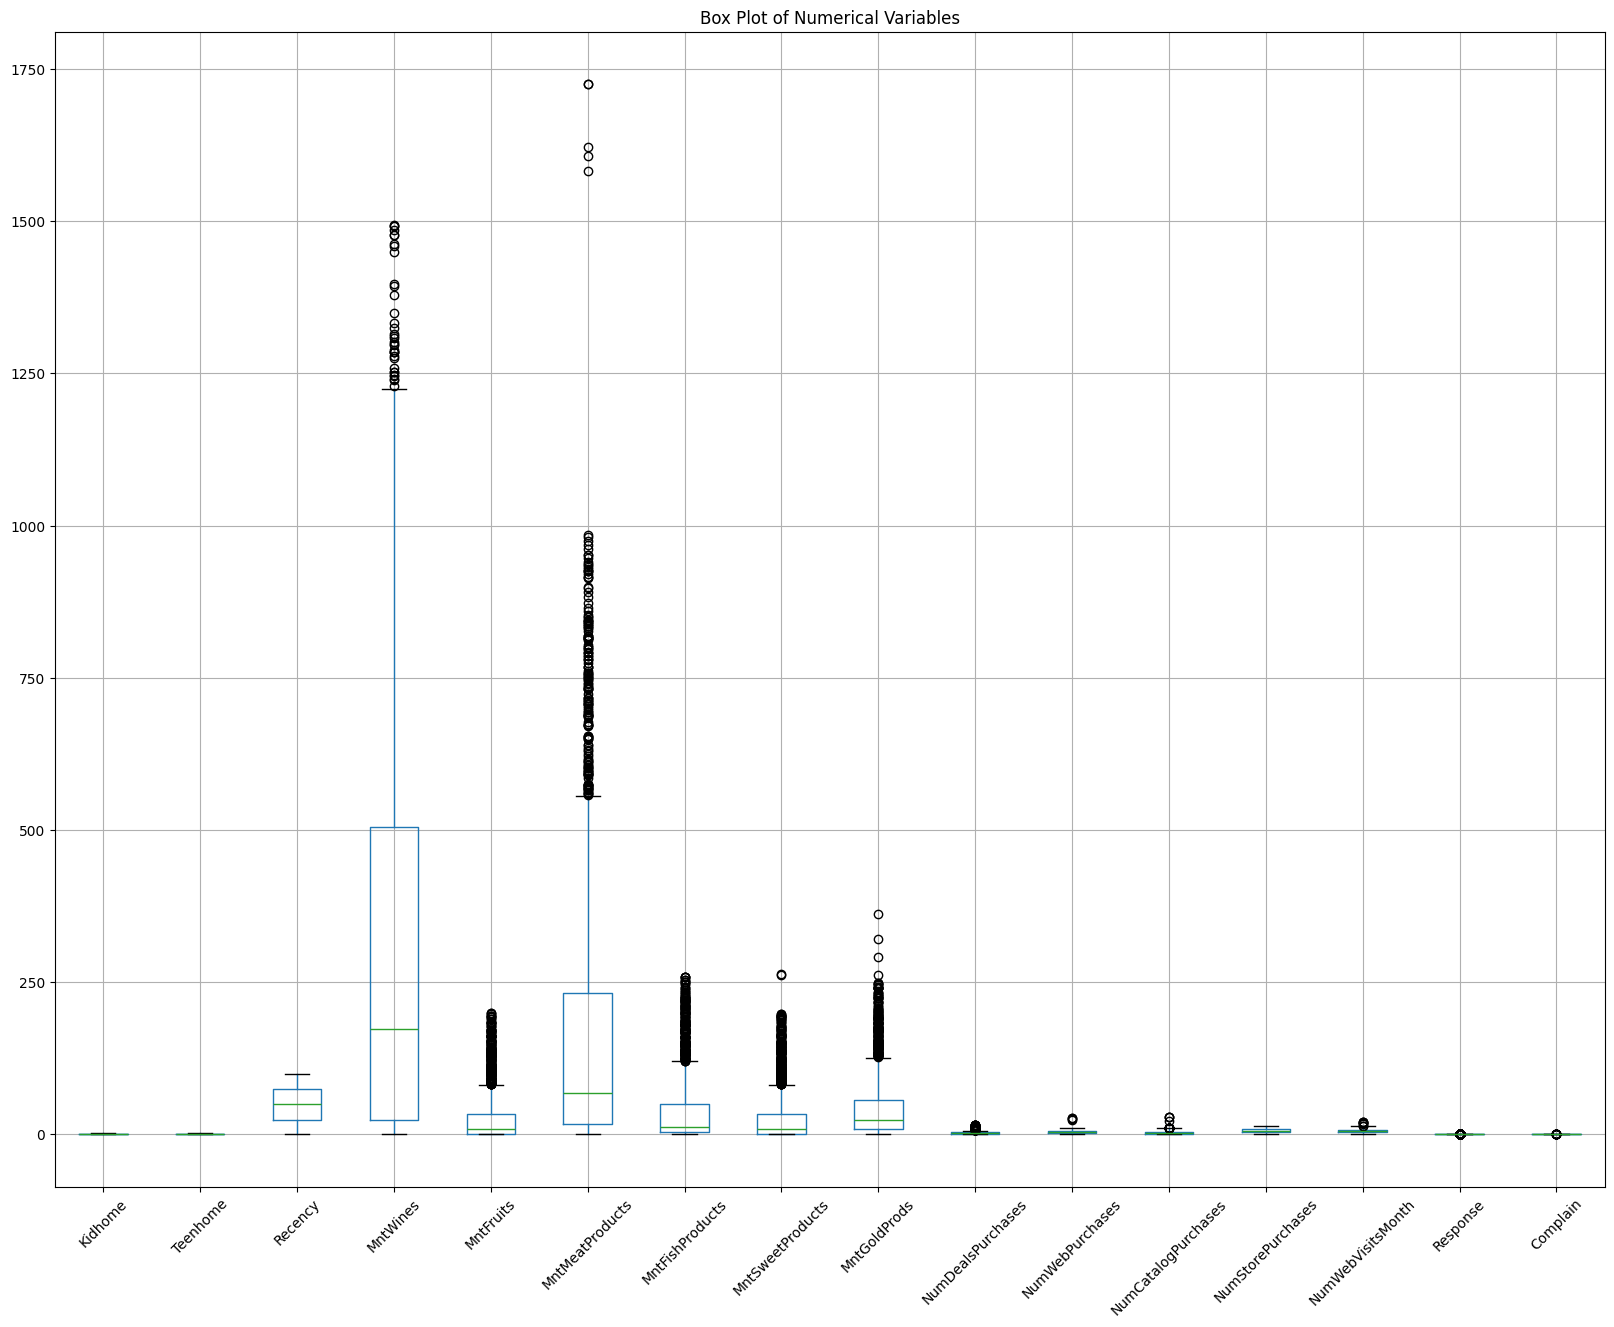

In [10]:
# Plot box plots for numerical variables
numerical_columns = df.columns[df.dtypes != 'object'].drop(['Income', 'Id', 'Year_Birth'])

plt.figure(figsize=(20, 15))
df[numerical_columns].boxplot(rot=45)
plt.title('Box Plot of Numerical Variables')
plt.show()

#### 5.3 Distribution of Categorical Variables

We will use bar plots to visualize the distribution of categorical variables.

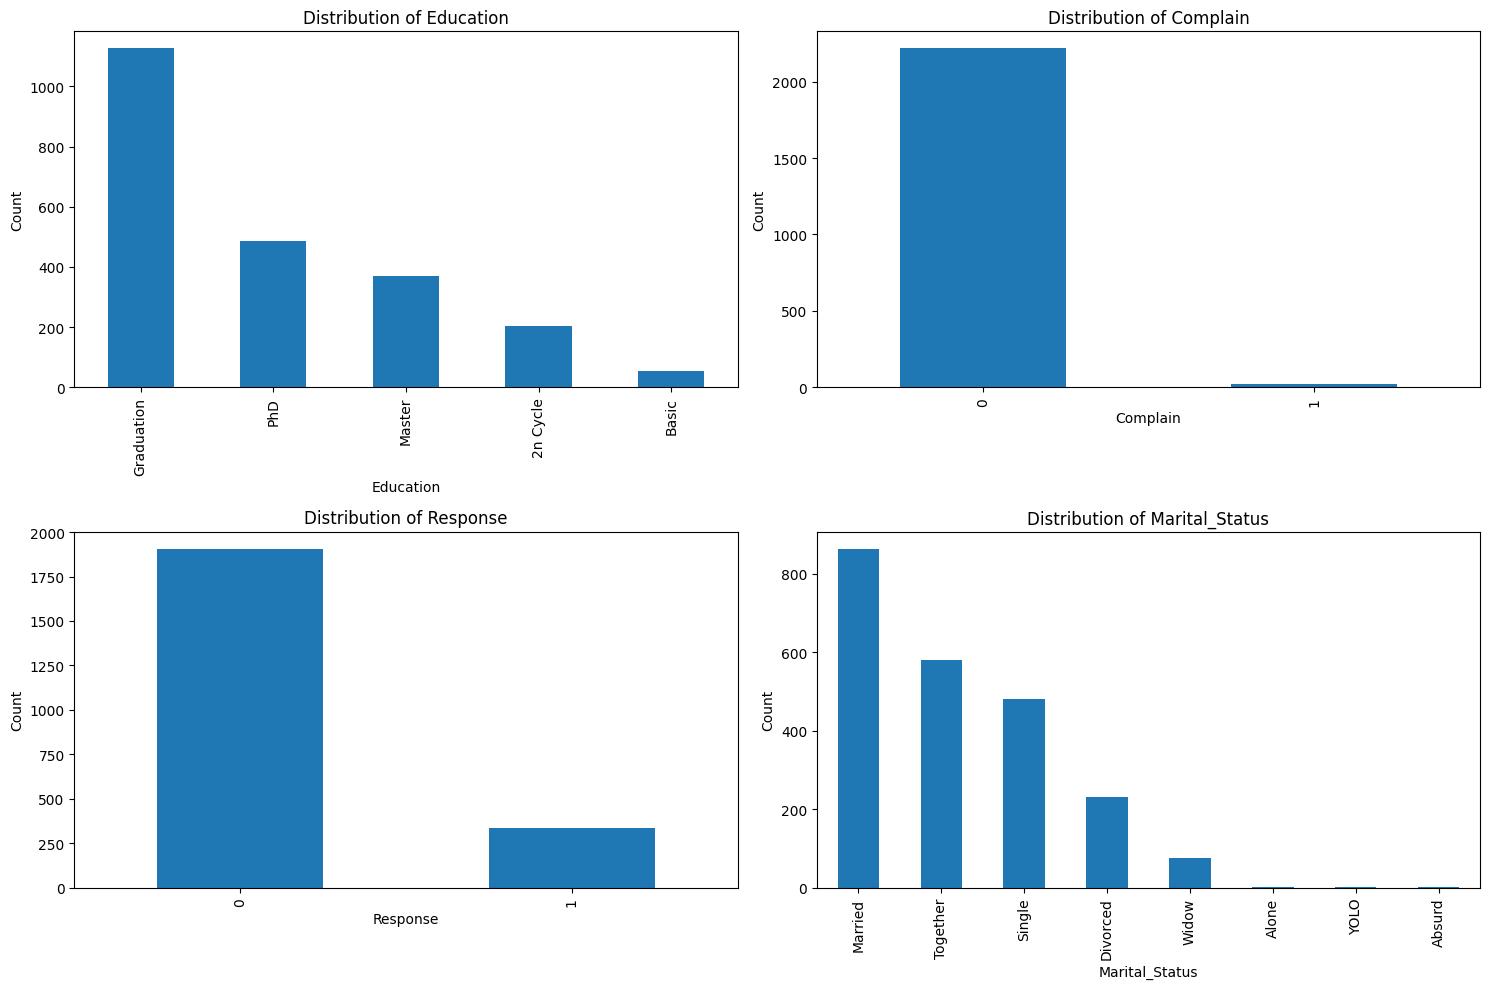

In [11]:
# Plot bar plots for categorical variables
categorical_columns = ['Education', 'Complain', 'Response', 'Marital_Status']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_ylabel('Count')

plt.tight_layout()
plt.show()


#### 5.4 Top and Bottom Values

We will examine the top 10 values for Income and mntmeatproduct the bottom 10 values for Year_Birth.

In [12]:
# Top 10 values for Income
top_10_income = df.nlargest(10, 'Income')
print("Top 10 values for Income:")
print(top_10_income[['Id', 'Income']])

# Top 10 values for Income
top_10_income = df.nlargest(10, 'MntMeatProducts')
print("Top 10 values for MntMeatProducts:")
print(top_10_income[['Id', 'MntMeatProducts']])

# Bottom 10 values for Year_Birth
bottom_10_year_birth = df.nsmallest(10, 'Year_Birth')
print("Bottom 10 values for Year_Birth:")
print(bottom_10_year_birth[['Id', 'Year_Birth']])

Top 10 values for Income:
         Id    Income
527    9432  666666.0
731    1503  162397.0
497    1501  160803.0
853    5336  157733.0
2204   8475  157243.0
325    4931  157146.0
1925  11181  156924.0
1826   5555  153924.0
210    4619  113734.0
832    4611  105471.0
Top 10 values for MntMeatProducts:
        Id  MntMeatProducts
325   4931             1725
961   5376             1725
497   1501             1622
1213  8720             1607
2204  8475             1582
1921  1065              984
53    1619              981
994   4947              974
2021  3104              968
1338  9220              961
Bottom 10 values for Year_Birth:
         Id  Year_Birth
513   11004        1893
827    1150        1899
2233   7829        1900
2171   6663        1940
1740   6932        1941
1202   4994        1943
1208   2968        1943
1209   8800        1943
1350   1453        1943
1475   6142        1943


### 6. Pair Plot

We will use pair plots to visualize the relationships between multiple numerical variables.

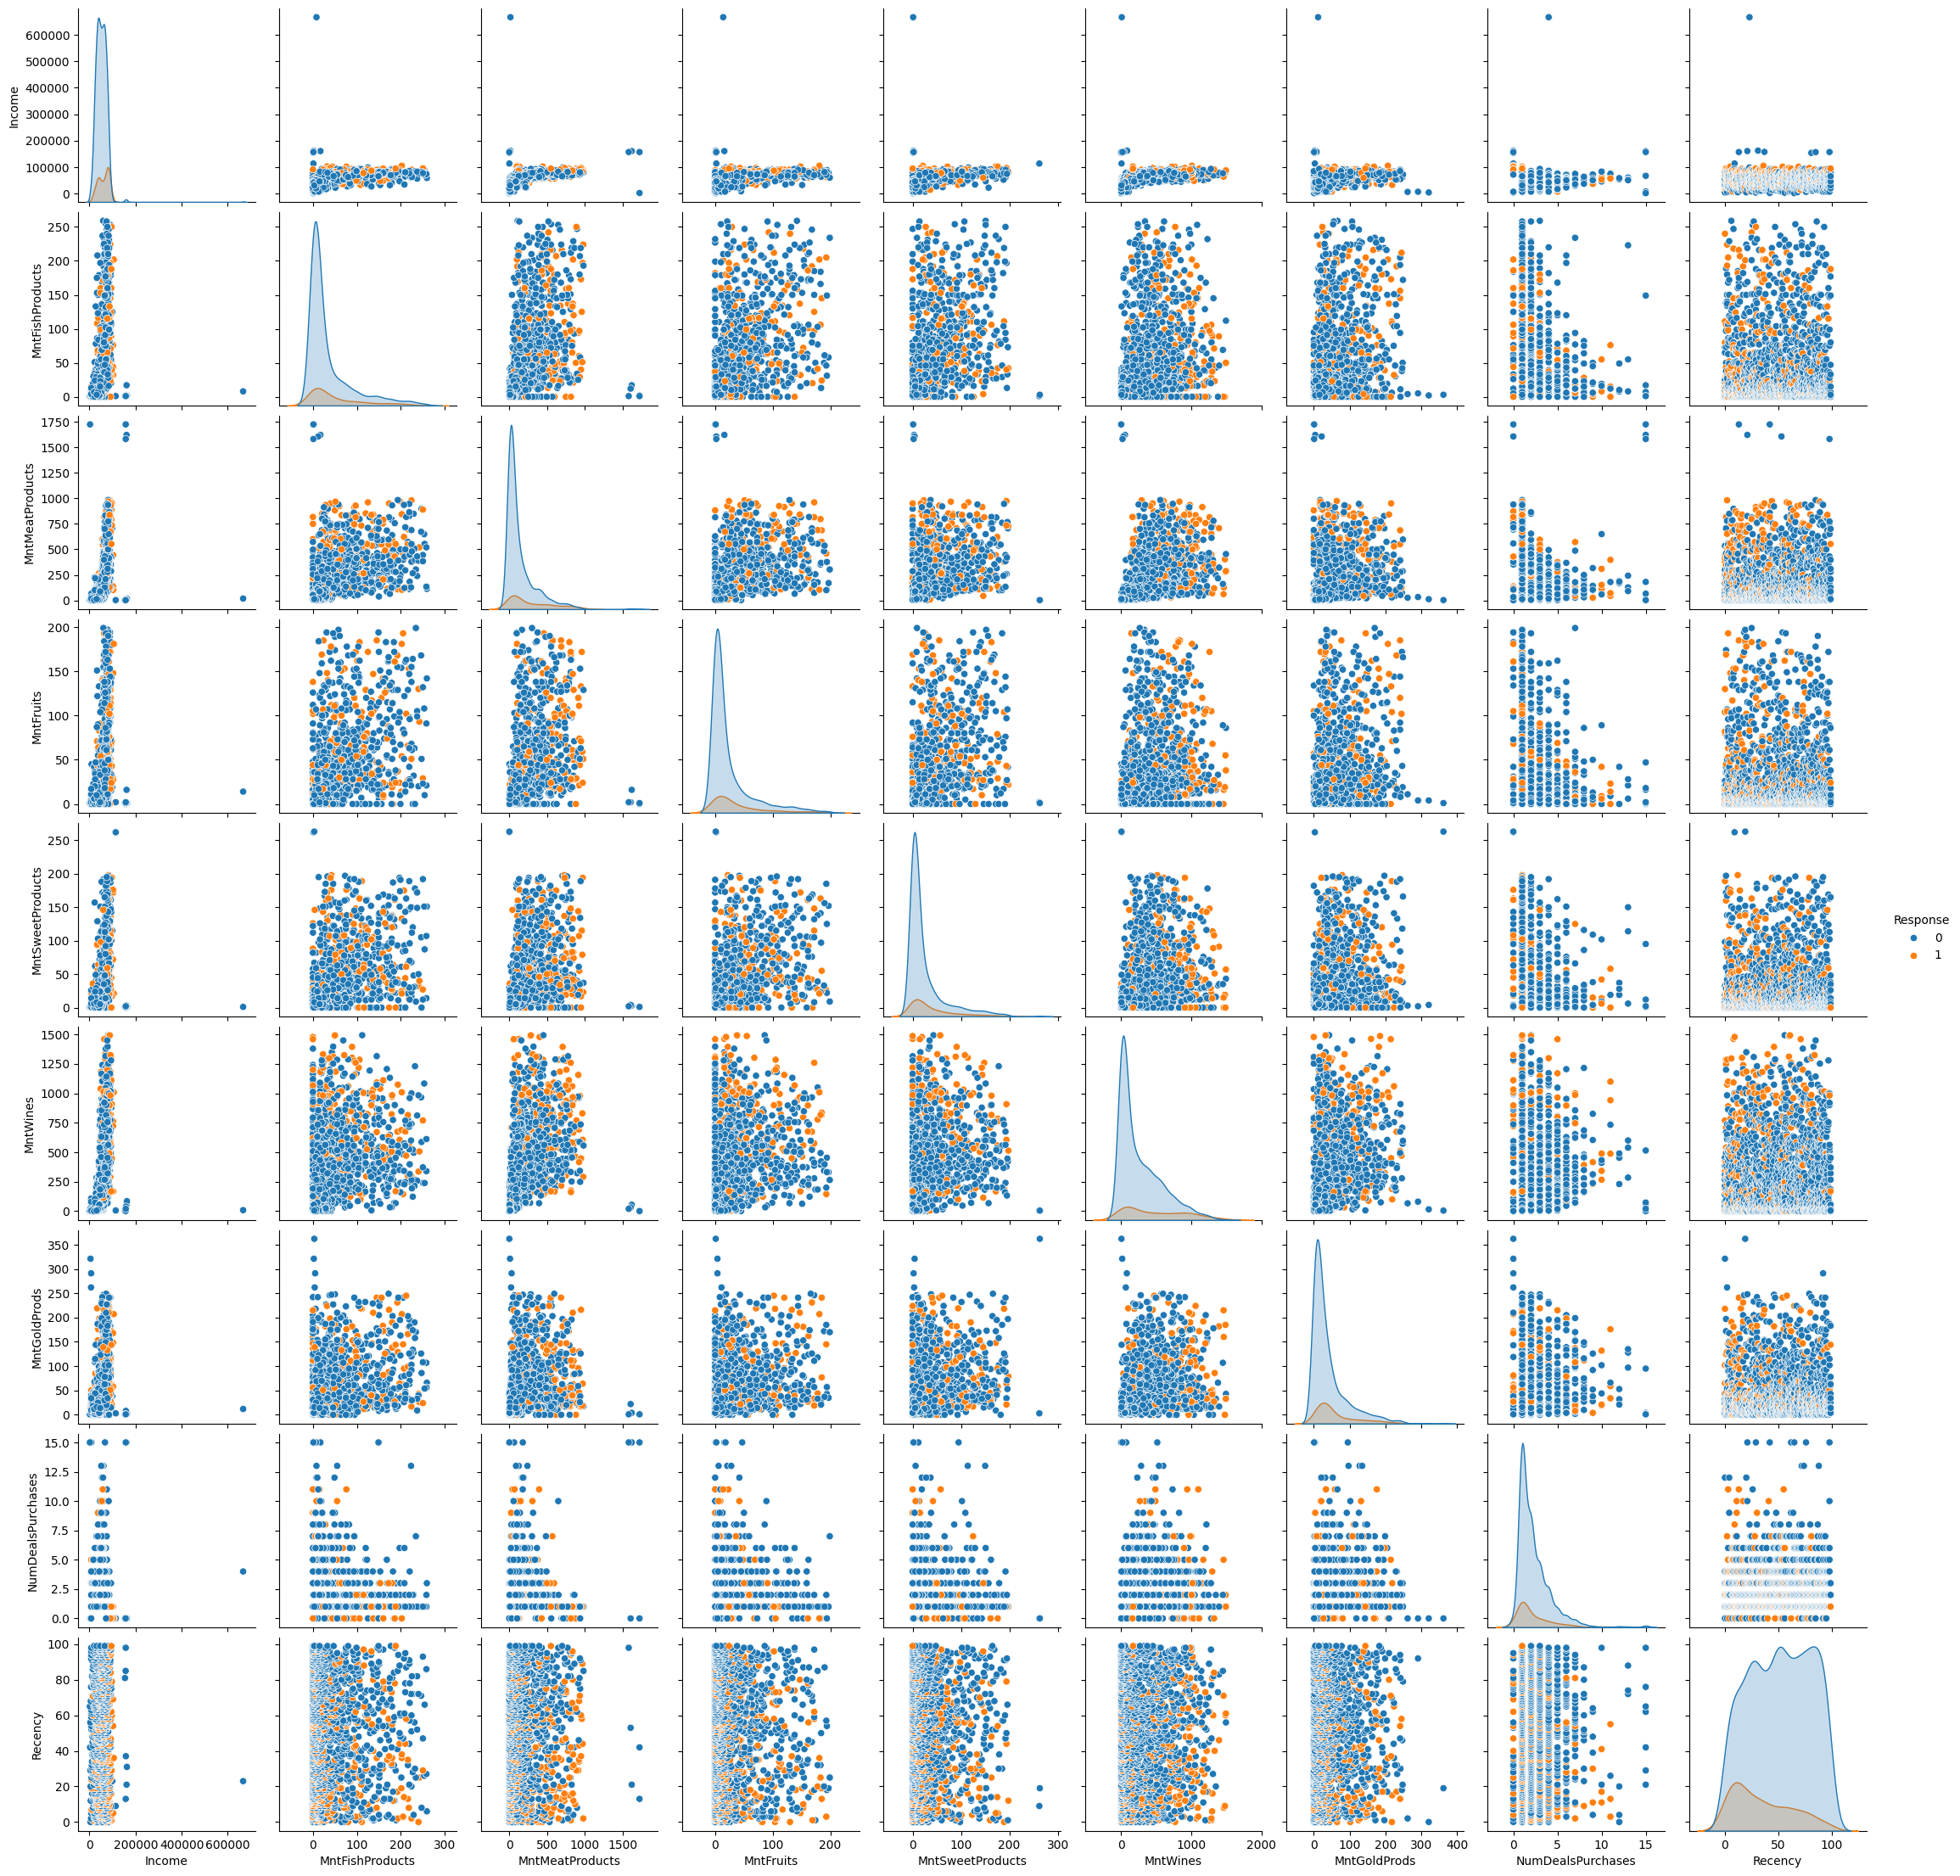

In [13]:
import seaborn as sns

# Select a subset of columns for the pair plot
pairplot_columns = ['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 
                    'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'Recency', 'Response']

# Plot pair plot
sns.pairplot(df[pairplot_columns], hue='Response')
plt.show()


### 7. Correlation Analysis

We will perform a correlation analysis to identify relationships between numerical variables and the target variable (Response).

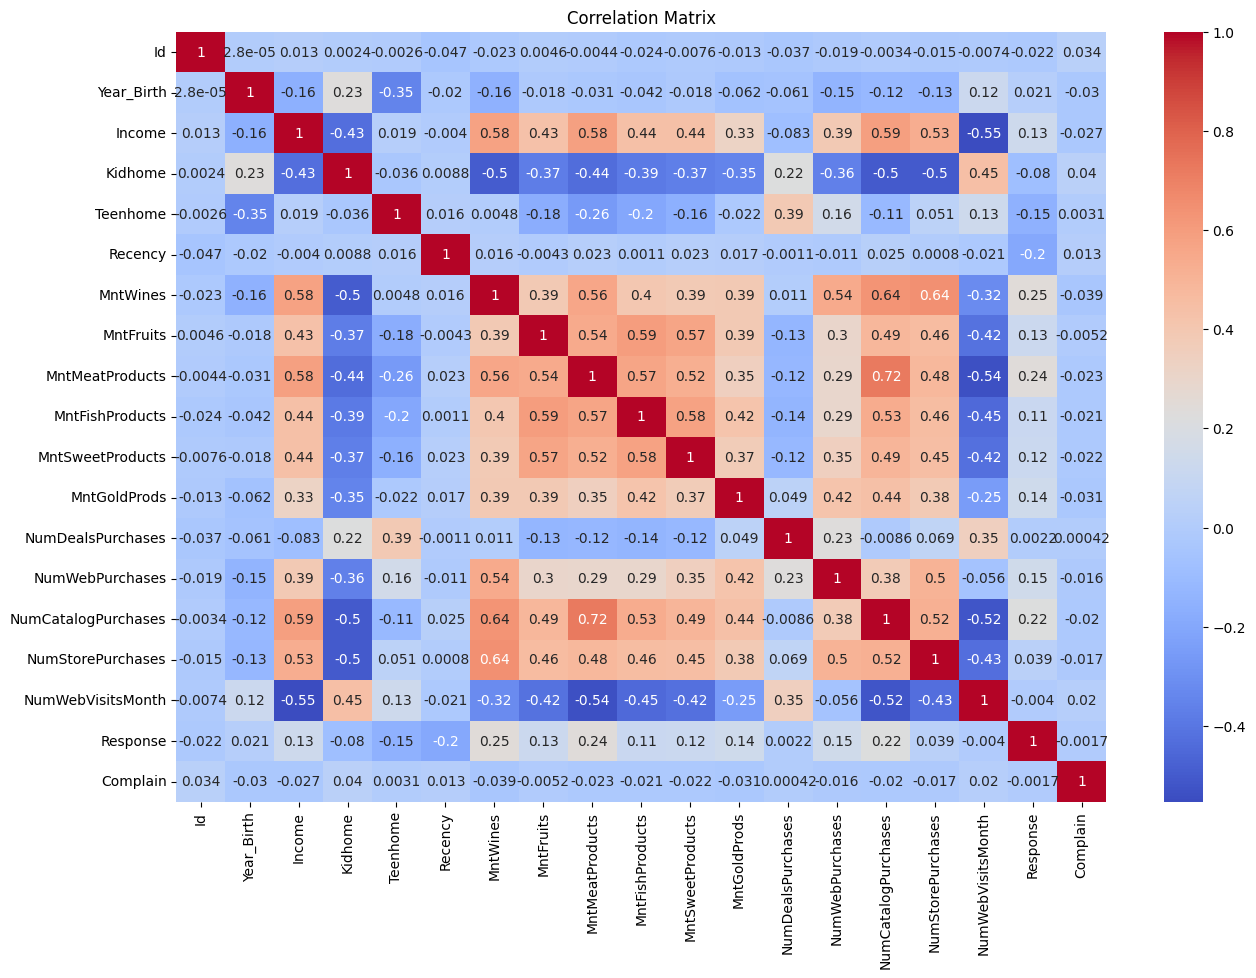

In [14]:
# Calculate correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Display the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preparation

## Introduction
In this section, we will prepare the data for modeling. This includes handling missing values, encoding categorical variables, and normalizing numerical variables. Proper data preparation is crucial for building an effective predictive model.

### 1. Handling Missing Values
First, we will handle any missing values in the dataset. We will decide whether to fill in missing values or drop the corresponding rows/columns based on the amount and significance of the missing data.


In [15]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

# Fill missing values (example: fill missing income with median income)
df['Income'].fillna(df['Income'].median(), inplace=True)

# # If other columns have missing values, we need to decide on the strategy
# # For simplicity, we will drop rows with any missing values
# df.dropna(inplace=True)

# Verify that there are no missing values left
df.isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16844\1418135244.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

### 2. Handling Outliers

We will handle outliers in the Year_Birth and Income columns to ensure they do not adversely affect our model.

In [16]:
# # Remove rows where Year_Birth is less than 1920
# df = df[df['Year_Birth'] >= 1940]

# # Remove rows where Income is greater than or equal to 400000
# df = df[df['Income'] < 400000]

# # Remove rows where MntMeatProducts is greater than or equal to 1000
# df = df[df['MntMeatProducts'] < 1000]

### 3. Encoding Categorical Variables

We will encode categorical variables using appropriate techniques such as one-hot encoding for nominal variables and label encoding for ordinal variables.

In [17]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Display the first few rows of the updated dataframe
df.head()

Id  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0   1826        1970  84835.0        0         0   6/16/2014        0   
1      1        1961  57091.0        0         0   6/15/2014        0   
2  10476        1958  67267.0        0         1   5/13/2014        0   
3   1386        1967  32474.0        1         1   11/5/2014        0   
4   5371        1989  21474.0        1         0    8/4/2014        0   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       189        104              379              111               189   
1       464          5               64                7                 0   
2       134         11               59               15                 2   
3        10          0                1                0                 0   
4         6         16               24               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Response  Complain  Education_Basic  \
0                  6                  1         1         0            False   
1                  7                  5         1         0            False   
2                  5                  2         0         0            False   
3                  2                  7         0         0            False   
4                  2                  7         1         0            False   

   Education_Graduation  Education_Master  Education_PhD  \
0                  True             False          False   
1                  True             False          False   
2                  True             False          False   
3                  True             False          False   
4                  True             False          False   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                 False                     True                   False   
1                 False                    False                   False   
2                 False                    False                    True   
3                 False                    False                   False   
4                 False                    False                   False   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                  False                    False                 False   
1                   True                    False                 False   
2                  False                    False                 False   
3                  False                     True                 False   
4                   True                    False                 False   

   Marital_Status_YOLO  
0                False  
1                False  
2                False  
3                False  
4                False

### 4. Feature Engineering

We will create new features or transform existing ones to enhance the predictive power of the model.

#### 4.1 Creating Age from Year_Birth

We will create a new feature Age from Year_Birth.

In [18]:
# Create Age feature
df['Age'] = 2024 - df['Year_Birth']


# Drop the original Year_Birth column
df.drop('Year_Birth', axis=1, inplace=True)

### 5. Splitting the Data

We will split the data into training and testing sets to evaluate the performance of our predictive model.

In [19]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df.drop(['Response', 'Id', 'Dt_Customer'], axis=1)
y = df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1784, 28), (447, 28), (1784,), (447,))

In [26]:
X_train

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1995  60631.0        1         1       88       565          6   
2003  30772.0        1         1       89         7          2   
1588  66480.0        1         1       71       199          9   
1911  51369.0        0         1       84       297          7   
1433  58607.0        0         1       63       867          0   
...       ...      ...       ...      ...       ...        ...   
1645  44375.0        0         1       73       213          5   
1101  70440.0        0         0       49       690        117   
1136  16927.0        1         1       50        20          2   
1301  42014.0        1         0       56       244         15   
865   77353.0        0         1       38       275         59   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1995               65                0                 6            19   
2003                4                2                 1             4   
1588               57               20                21             6   
1911               79                0                11           182   
1433               86                0                 0            19   
...               ...              ...               ...           ...   
1645               28                7                 7            41   
1101              499               76               102            88   
1136               23                3                 1             4   
1301              108                4                15            50   
865               107               69               101            59   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1995                  5                9                    2   
2003                  1                1                    0   
1588                  7                4                    1   
1911                  2                8                    2   
1433                  3                2                    3   
...                 ...              ...                  ...   
1645                  1                4                    1   
1101                  1                5                   10   
1136                  5                3                    0   
1301                  6                7                    1   
865                   2                6                    4   

      NumStorePurchases  NumWebVisitsMonth  Complain  Education_Basic  \
1995                  8                  7         0            False   
2003                  2                  6         0            False   
1588                  7                  4         0            False   
1911                  4                  8         0            False   
1433                  9                  8         0            False   
...                 ...                ...       ...              ...   
1645                  6                  5         0            False   
1101                  7                  3         0            False   
1136                  4                  8         0            False   
1301                  6                  8         0            False   
865                   8                  4         0            False   

      Education_Graduation  Education_Master  Education_PhD  \
1995                 False             False           True   
2003                  True             False          False   
1588                  True             False          False   
1911                  True             False          False   
1433                 False             False           True   
...                    ...               ...            ...   
1645                  True             False          False   
1101                  True             False          False   
1136                 False             False           True   
1301                  True           

# Modeling

## Introduction
In this section, we will build a predictive model using the Random Forest Classifier. We will train the model on our training dataset

### 1. Training the Model
We will start by training the Random Forest Classifier on the training dataset.


In [20]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Evaluate the = model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[366  10]
 [ 54  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       376
           1       0.63      0.24      0.35        71

    accuracy                           0.86       447
   macro avg       0.75      0.61      0.63       447
weighted avg       0.83      0.86      0.83       447


Accuracy Score:
0.8568232662192393


In [21]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Evaluate the = model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[359  17]
 [ 52  19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       376
           1       0.53      0.27      0.36        71

    accuracy                           0.85       447
   macro avg       0.70      0.61      0.63       447
weighted avg       0.82      0.85      0.82       447


Accuracy Score:
0.8456375838926175


### 2. Hyperparameter Tuning

To improve the performance of our model, we will perform hyperparameter tuning using GridSearchCV.

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8}
Best Score: 0.868835174519246


# Evaluation

## Introduction
In this section, we will evaluate the performance of our optimized Random Forest Classifier model. We will use various evaluation metrics such as the confusion matrix, classification report, and accuracy score to assess how well our model performs on the testing dataset.

### 1. Confusion Matrix
The confusion matrix provides a summary of the prediction results on the testing dataset. It shows the number of true positives, true negatives, false positives, and false negatives.

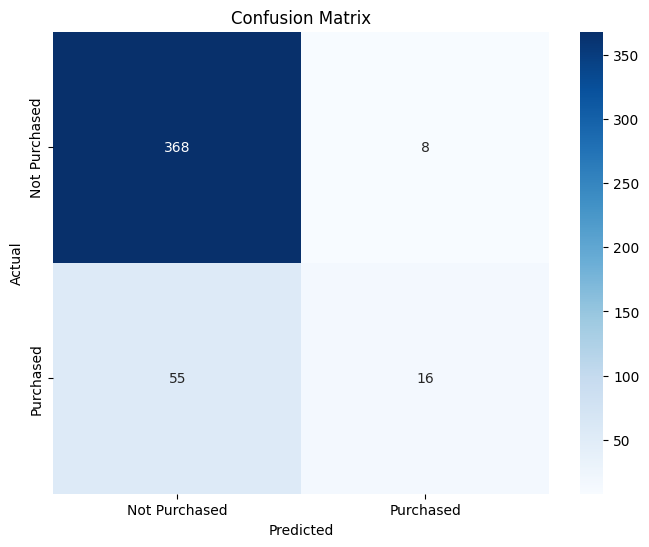

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Use the best model to make predictions
best_rfc = grid_search.best_estimator_
y_pred_best = best_rfc.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### 2. Classification Report

The classification report provides a detailed breakdown of the precision, recall, F1-score, and support for each class.

In [24]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Not Purchased', 'Purchased']))

Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.87      0.98      0.92       376
    Purchased       0.67      0.23      0.34        71

     accuracy                           0.86       447
    macro avg       0.77      0.60      0.63       447
 weighted avg       0.84      0.86      0.83       447



# Deployment

## Introduction
In this section, we will discuss how to deploy our optimized Random Forest Classifier model. Deployment involves saving the trained model so that it can be used to make predictions on new data. We will use joblib to save the model and provide an example of how to load the model and make predictions.

### 1. Saving the Model
We will use joblib to save the trained model to a file. This allows us to reuse the model without having to retrain it.


In [25]:
# import joblib

# # Save the trained model to a file
# joblib_file = "rfc_model.joblib"
# joblib.dump(rfc, joblib_file)

# print(f"Model saved to {joblib_file}")